In [1]:
import squidpy
import pylab as pl
%matplotlib inline

mock1 = squidpy.Mock('mock1')
mock2 = squidpy.Mock('mock2')
instruments = squidpy.InstrumentList(mock1, mock2)

In [2]:
instruments

mock1,"['time', 'voltage', 'wave']"
mock2,"['time', 'voltage', 'wave']"


In [3]:
title = 'my first experiment'
test = squidpy.Experiment(title, instruments.all())

test.sweep(mock2,'voltage')[0:3:1]
test.sweep(mock1,'voltage')[0:0.3:.1]
test.measure(instruments.all())

mock1.reset_timer()
test.run()

In [15]:
title = 'my first experiment'
test = squidpy.Experiment(title, instruments.all())
test.watch(10)
mock1.time = 0
test.run()

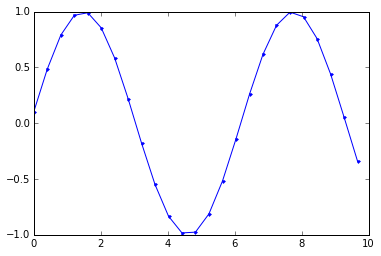

In [24]:
pl.plot(test.data['mock1.time'], test.data['mock1.wave'], '.-')

Todo:
- automatically add parameters and labels to plot
- use any way of plotting with matplotlib
- fig.update() replots all lines with updated values
- multiple figure support


In [ ]:
title = 'my first experiment'
test = squidpy.Experiment(title, instruments.all())
test.watch(10)

fig = livefigure(test.plotter_pipe)
subplot(121)
plot('mock1.time','mock1.wave')
title('test1')
subplot(122)
plot('mock2.time', 'mock2.wave')
title('test2')a

mock1.reset_timer()
test.run()